<a href="https://colab.research.google.com/github/Crisvela67/Modelo-Predictivo-supervivencia-/blob/main/E3_FMY0100D_001D_ET_5_Avello_Velasquez_Salinas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### ASIGNATURA:FUNDAMENTOS DE MACHINE LEARNING

### NOMBRE PROYECTO: Aplicando machine learning al juego counter strike

### FECHA: 14-10-2022

### NOMBRE INTEGRANTES:
- Sebastian Avello
- Fabian Salinas
-Cristopher Velasquez



## METODOLOGÍA UTILIZADA EN EL PROYECTO DE CIENCIA DE DATOS
## NOMBRE: CRISP-DM
* FASE 1: Comprensión del Negocio: objetivos especificos de la fase
* FASE 2: Comprensión de los datos: objetivos especificos de la fase
* FASE 3: Preparación de los datos: objetivos especificos de la fase
* FASE 4: Modelado: objetivos especificos de la fase
* FASE 5: Evaluación del modelo: objetivos especificos de la fase
* FASE 6: Despliegue: objetivos especificos de la fase

##Objetivo


OBJETIVO: Determinar si un jugador sobrevivió o no en una determinada partida
VARIABLE OBJETIVO: , columna Survived.

*   Variable categórica
*   Columna Survived
*   Valor Booleano
*   Resultado esperado: true: sobrevive y false:  no sobrevive



# FASE 1: Comprensión del Negocio




##CONTEXTO


En cada partida de Counter Strike: GO dos equipos de 5 jugadores (denominados terroristas y contra-terroristas) se enfrentan. El objetivo del equipo terrorista es plantar una bomba con timer de 45 segundos en uno de dos sitios específicos dentro de un mapa. Por otro lado, el objetivo del equipo contraterrorista es evitar que la bomba sea plantada o desactivarla antes de que ésta explote cuando ya ha sido plantada. Los datos han sido extraídos de replays, los cuales son archivos propietarios con la información de cada una de las acciones realizadas por cada jugador dentro de una partida.

# FASE 2: Comprensión de los datos

### DESCRIPCIÓN DE LA DATA
* Map: Nombre del Mapa donde se jugó la partida
* Team: Nombre de equipo al que pertenece el jugador
* MatchId: Identificador de la partida
* RoundId: Identificador de la ronda (los equipos se enfrentan en rondas de 5 partidas seguidas)
* SteamID: Identificador único del jugador
* MatchId: Identificador de la partida
* MatchWinner: Indica si el jugador ganó o no la partida.
* RoundWinner: Indica si el jugador ganó o no la ronda analizada.
* Survived: Indica si el jugador sobrevivió o no a la partida (sobrevivir no es sinónimo de ganar).
* AbnormalMatch: Indica si la partida tuvo un error por conexión de red
* TimeAlive: Indica el tiempo en segundos que el jugador estuvo vivo durante el juego
* ScaledTimeAlive: Tiempo de vida del jugador escalado al tiempo de vida del jugador que más duró en la ronda.
* AvgCentroidDistance: Distancia promedio del jugador al centroide del equipo.
* TravelledDistance: Distancia promedio viajada por el jugador durante la partida.
* AvgSiteDistance: Distancia promedio del jugador al objetivo más cercano.
* AvgRoundVelocity: Velocidad promedio del jugador en la ronda.
* AvgKillDistance: Distancia promedio viajada por el jugador antes de su primer kill.
* RLethalGrenadesThrown/RNonLethalGrenadesThrown: Cantidad de granadas lanzadas, categorizadas en letales y no-letales.
* PrimaryXXXX: Porcentaje de uso arma clasificada como primaria. Categorizada en AssaultRifle, SniperRifle, SMG, Heavy y Pistol.
* [Match|Round]Assists: Cantidad de asistencias efectuadas por el jugador durante la partida o la ronda.
* [Match|Round]Kills: Cantidad de kills efectuados por el jugador durante la partida o la ronda.
* [Match|Round]FlankKills: Cantidad de kills efectuados por el jugador sin que la víctima lo viese durante la partida o la ronda. [Match|Round]HeadShots: Cantidad de kills efectuados por el jugador a través de un tiro en la cabeza durante la partida o la ronda.
* RoundStartingEquipmentValue: Valor del equipamiento llevado por el jugador al inicio de la ronda.
* TeamStartingEquipmentValue: Valor promedio del equipamiento llevado por el equipo del jugador al inicio de la ronda.
*AvgMatchKillDist: Distancia promedio viajada por el jugador entre kills.

En este mini-proyecto trabajaremos con el resultado de este pre-proceso el cual corresponde a un archivo CSV con 79157 filas, cada una correspondiente a un jugador dentro de una partida. El archivo contiene 36 columnas correspondientes a variables que describen las acciones del jugador dentro del juego.

In [ ]:
#Carga de librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report, precision_score, accuracy_score, recall_score, f1_score
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.preprocessing import Normalizer
from sklearn.naive_bayes import GaussianNB
import warnings
warnings.simplefilter('ignore')

In [ ]:
# carga de archivo de datos al entorno Collab
!wget https://www.dropbox.com/s/7oqxw13wt4sdxha/formab.csv
df = pd.read_csv("formab.csv", sep=";")

--2022-11-25 21:50:58--  https://www.dropbox.com/s/7oqxw13wt4sdxha/formab.csv
Resolving www.dropbox.com (www.dropbox.com)... 162.125.5.18, 2620:100:601d:18::a27d:512
Connecting to www.dropbox.com (www.dropbox.com)|162.125.5.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/7oqxw13wt4sdxha/formab.csv [following]
--2022-11-25 21:50:59--  https://www.dropbox.com/s/raw/7oqxw13wt4sdxha/formab.csv
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucc4d47e1ea85ca5921c52b1b356.dl.dropboxusercontent.com/cd/0/inline/BxfX_25LXTeoXBHMB7mDNYmB0UuThIj_0FxRvqr1ImSF4dhv14McM1IcU29FsP2sI46-E9CNxf-h0xAG3NmqOL_JONpio_fG8P5GNWsoSlsehkvTbnPa2yaJCZ9a7i24KZnK-jSgHUObU846h-PY5k1WNKbUABCVpJL8ezytiLUlWg/file# [following]
--2022-11-25 21:50:59--  https://ucc4d47e1ea85ca5921c52b1b356.dl.dropboxusercontent.com/cd/0/inline/BxfX_25LXTeoXBHMB7mDNYmB0UuThIj_0FxRvqr1ImSF4dhv14McM1IcU29FsP2sI46-E9CNxf-h0xAG3NmqOL

####Mapa de calor

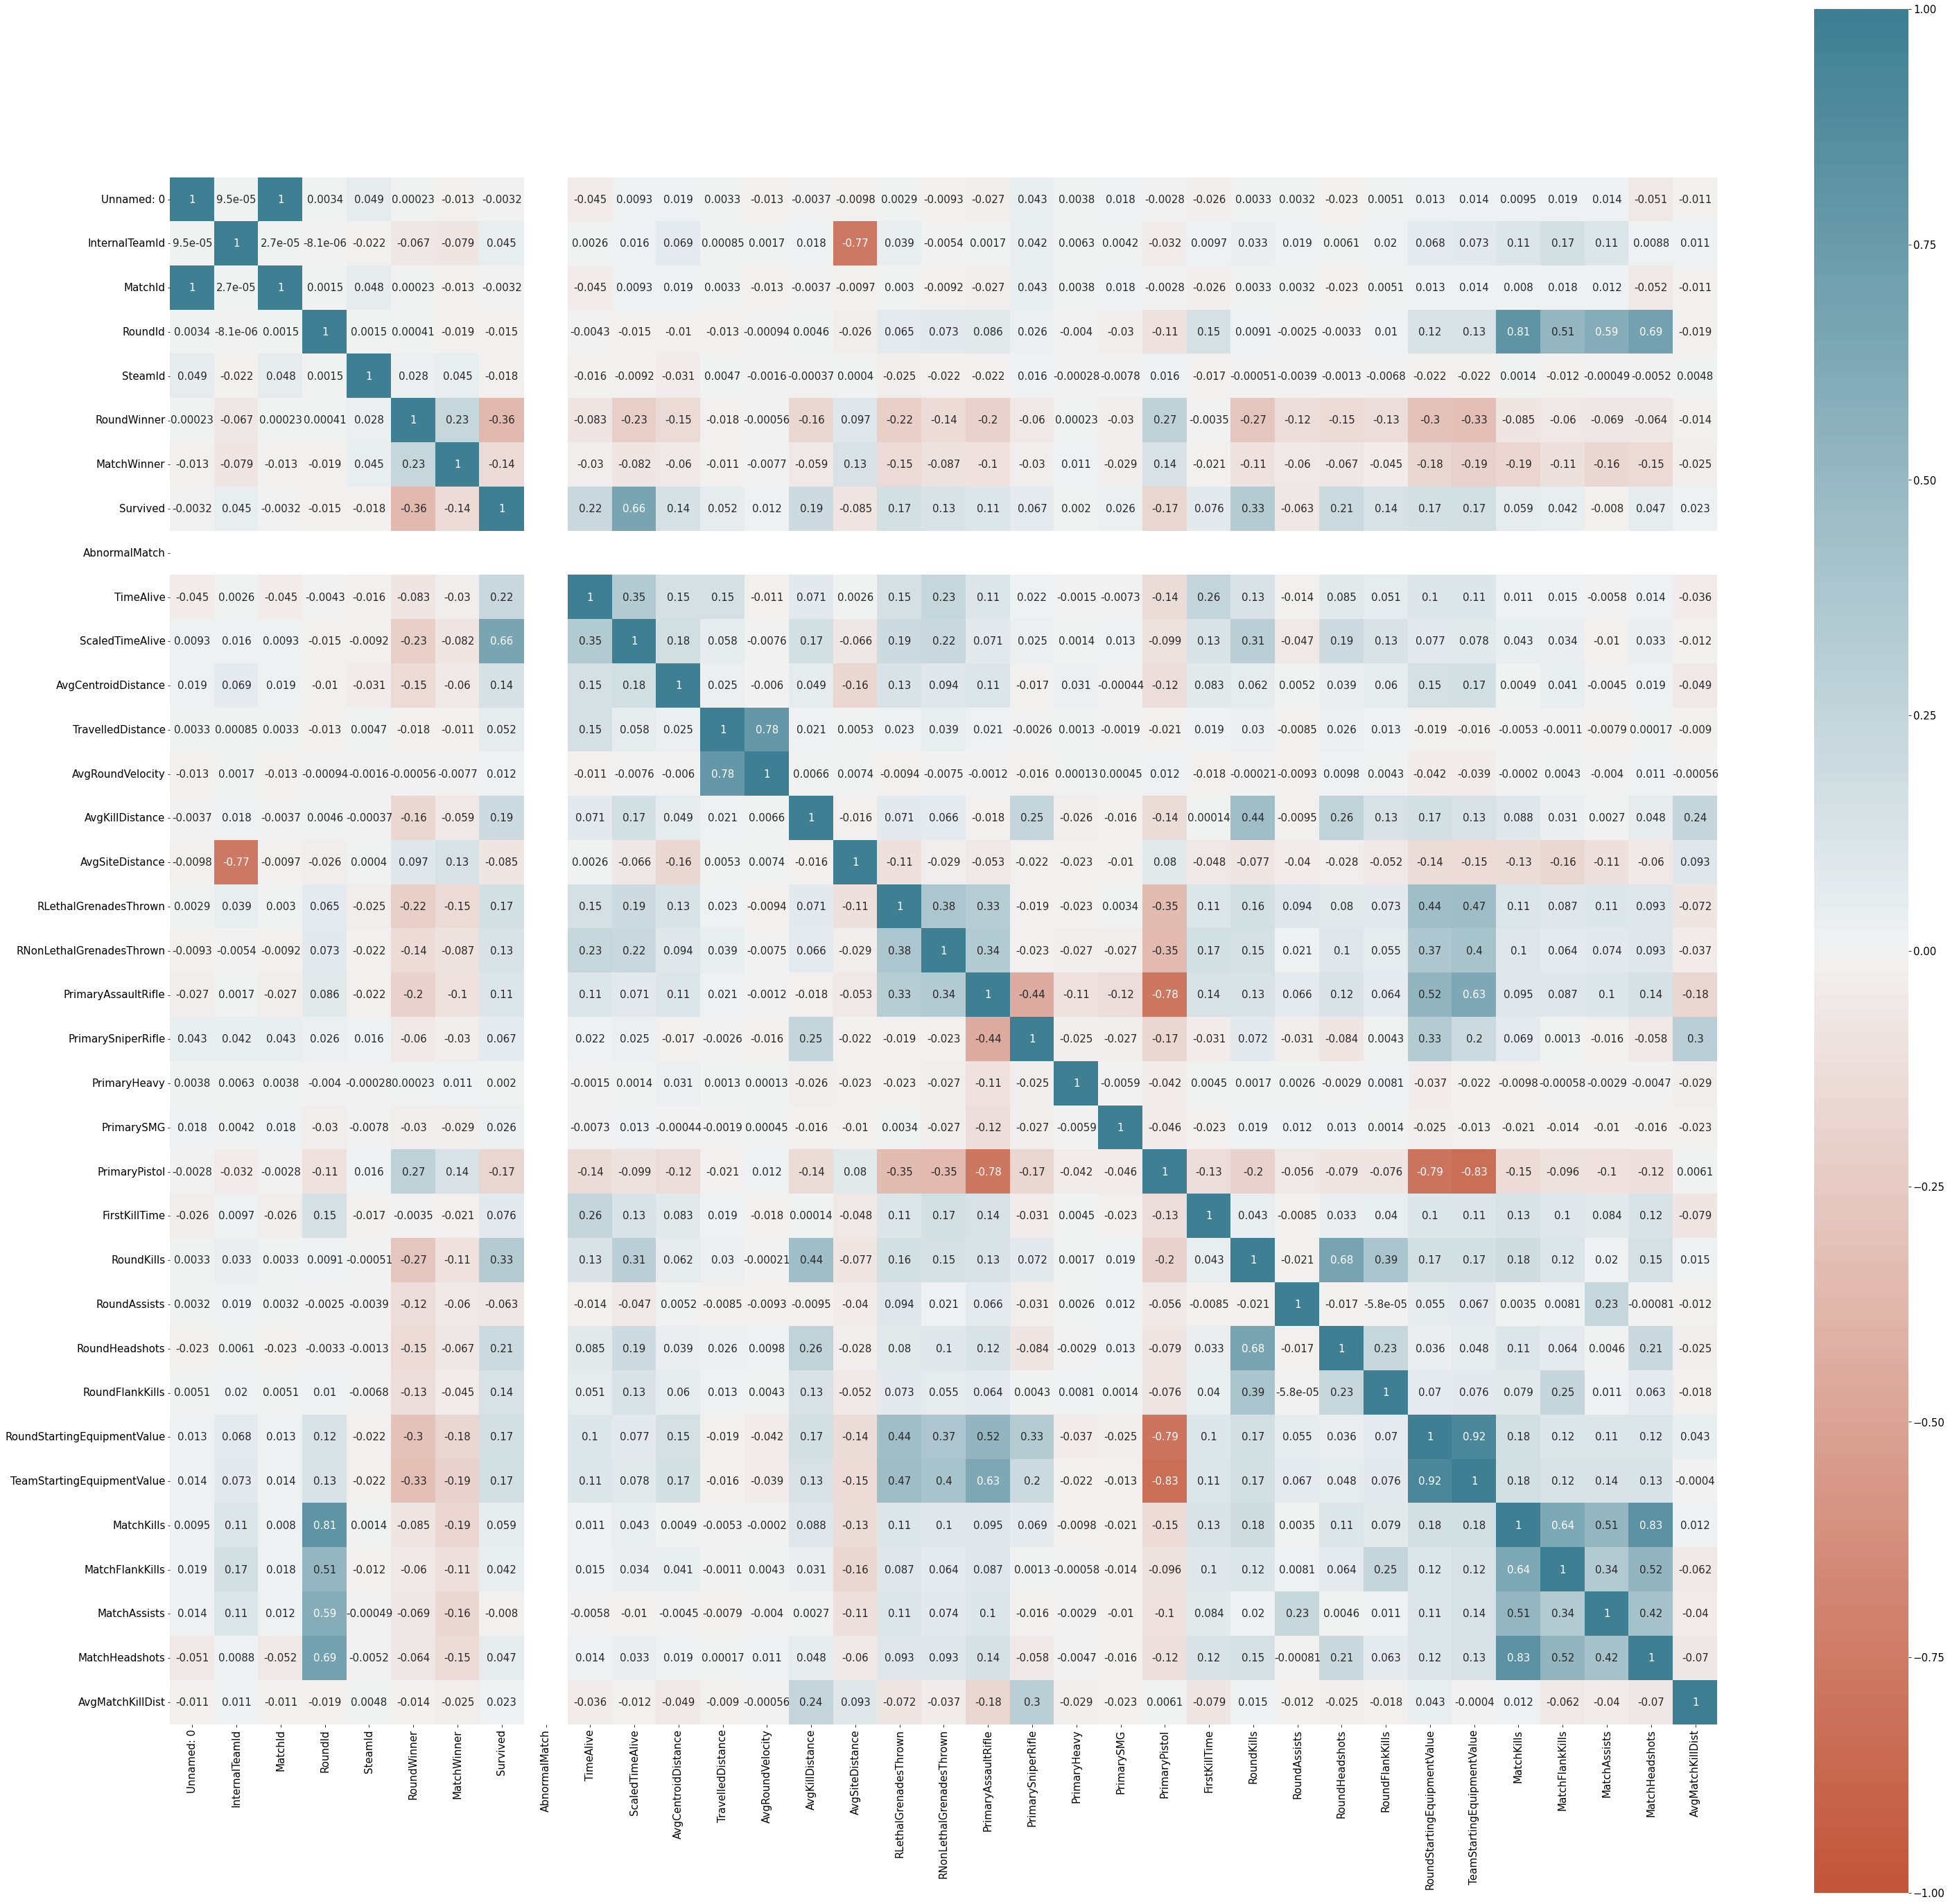

In [ ]:
corr = df.corr()

sns.heatmap(corr, vmin=-1, vmax=1, center=0,cmap=sns.diverging_palette(20, 220, n=200),square=True, annot=True)
plt.rcParams['figure.figsize'] = (50, 50)
plt.rcParams['font.size'] = 15
plt.show()


Visualizando el  mapa de calor seleccionamos las variables
('TimeAlive', 'RoundWinner', 'RoundKills','RoundStartingEquipmentValue', 'Map') las cuales presentan una mayor coorelacion , lo que conlleva despues a un modelo con un buen desempeño en la siguente fase.

####Cantidad de filas y columnas


In [ ]:
print(f"N° de filas {df.shape[0]}")
print(f"N° de columnas {df.shape[1]}")

N° de filas 79157
N° de columnas 37


Se tiene un total de 79157 filas que representan un conjunto de datos por cada partida u ronda de un jugador y ademas hay un total de 37 columnas de corresponden a la cantidad de variables existentes.

#### Filas repetidas


In [ ]:
print('Cantidad de filas duplicadas: ',df.duplicated().sum())


Cantidad de filas duplicadas:  0


Como se puede apreciar con la respuesta del codigo anterior, no existe ninguna fila con exactamente los mismos datos

####Tipos de datos

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79157 entries, 0 to 79156
Data columns (total 37 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Unnamed: 0                   79157 non-null  int64  
 1   Map                          79157 non-null  object 
 2   Team                         79157 non-null  object 
 3   InternalTeamId               79157 non-null  int64  
 4   MatchId                      79157 non-null  int64  
 5   RoundId                      79157 non-null  int64  
 6   SteamId                      79157 non-null  int64  
 7   RoundWinner                  79157 non-null  bool   
 8   MatchWinner                  79157 non-null  bool   
 9   Survived                     79157 non-null  bool   
 10  AbnormalMatch                79157 non-null  bool   
 11  TimeAlive                    79157 non-null  float64
 12  ScaledTimeAlive              79157 non-null  float64
 13  AvgCentroidDista

En total hay 4 datos tipo Boolean , 13 datos tipo Float64, 18 datos tipo int64 y 2 datos tipo object.
* Tambien podemos verificar que no existen datos nulos

In [ ]:
df.head(10)

,Unnamed: 0,Map,Team,InternalTeamId,MatchId,RoundId,SteamId,RoundWinner,MatchWinner,Survived,...,RoundAssists,RoundHeadshots,RoundFlankKills,RoundStartingEquipmentValue,TeamStartingEquipmentValue,MatchKills,MatchFlankKills,MatchAssists,MatchHeadshots,AvgMatchKillDist
0,600,de_inferno,Terrorist,1,4,1,76561198036987787,False,True,False,...,0,0,0,750,4400,0,0,0,0,501379.183091
1,601,de_inferno,Terrorist,1,4,1,76561197971812216,False,True,False,...,0,0,0,800,4400,0,0,0,0,208807.587297
2,602,de_inferno,Terrorist,1,4,1,76561197972240652,False,True,False,...,0,0,0,1000,4400,0,0,0,0,381652.027911
3,603,de_inferno,Terrorist,1,4,1,76561197975824962,False,True,False,...,0,0,0,850,4400,0,0,0,0,289754.503091
4,604,de_inferno,Terrorist,1,4,1,76561197960331095,False,True,True,...,0,0,0,1000,4400,0,0,0,0,254527.691176
5,605,de_inferno,CounterTerrorist,2,4,1,76561198106907258,True,False,True,...,0,0,0,850,3750,0,0,0,0,437982.273268
6,606,de_inferno,CounterTerrorist,2,4,1,76561198019196091,True,False,True,...,0,0,0,400,3750,0,0,0,0,335133.830648
7,607,de_inferno,CounterTerrorist,2,4,1,76561197965932989,True,False,True,...,1,0,0,800,3750,0,0,1,0,312706.360002
8,608,de_inferno,CounterTerrorist,2,4,1,76561198001822267,True,False,True,...,0,1,1,850,3750,3,1,0,1,365548.186823
9,609,de_inferno,CounterTerrorist,2,4,1,76561198006466707,True,False,True,...,0,2,0,850,3750,2,0,0,2,307554.991424


#### TimeAlive

---
Indica el tiempo en segundos que el jugador estuvo vivo durante el juego


In [ ]:
print("Estadisticos Generales para variable TimeAlive")
df.TimeAlive.describe()

Estadisticos Generales para variable TimeAlive


count    79157.000000
mean        72.795720
std         48.321035
min          0.000000
25%         47.080072
50%         69.239615
75%         92.647813
max       2990.560394
Name: TimeAlive, dtype: float64

El promedio de vida de un jugador es de 72.79 durante el juego y el maximo es de 2990.56 Segundos.

In [ ]:
bins = list(range(0, 3000+1, 500))

df["TimeAlive"] =  pd.cut(df["TimeAlive"], bins=bins)

print("Tabla de frecuencias")
(df
  .groupby("TimeAlive")
  .agg(frequency=("TimeAlive", "count")))

Tabla de frecuencias


,frequency
TimeAlive,
"(0, 250]",78835
"(250, 500]",193
"(500, 750]",17
"(750, 1000]",26
"(1000, 1250]",9
"(1250, 1500]",0
"(1500, 1750]",0
"(1750, 2000]",0
"(2000, 2250]",0


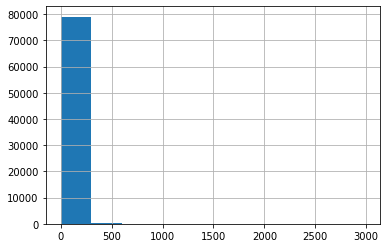

In [ ]:
df['TimeAlive'].hist(bins=10)

Los jugadores sobreviven mayormente entre el segundo 0 y 500. Como se aprecia en el histograma hay una gran brecha de datos.

#### RoundWinner

---
Indica si el jugador ganó o no la ronda analizada.


In [ ]:
print("Estadisticos Generales para variable RoundWinner")
df.RoundWinner.describe()

Estadisticos Generales para variable RoundWinner


count     79157
unique        2
top       False
freq      39589
Name: RoundWinner, dtype: object

Se repite con mayor frecuencia False con 39589 de un total de 79157 Datos  

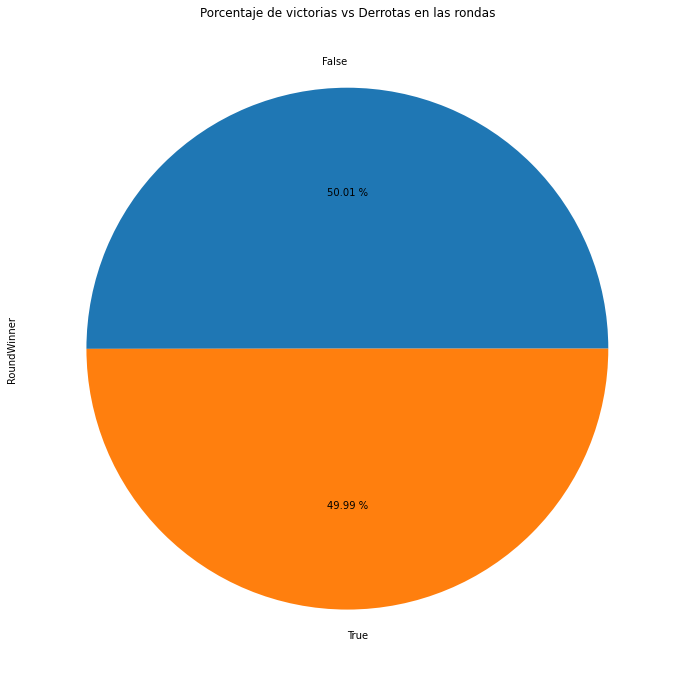

In [ ]:
serie = df.RoundWinner.value_counts()
serie.plot.pie(autopct="%0.2f %%")
plt.title("Porcentaje de victorias vs Derrotas en las rondas")
plt.show()

In [ ]:
df.RoundWinner.value_counts()

False    39589
True     39568
Name: RoundWinner, dtype: int64

El porcentaje de derrotas(50.01%) es mas alto que el de victorias(49.99%) en las rondas.



#### RoundKills

---
Cantidad de kills efectuados por el jugador durante la ronda.


In [ ]:
print("Estadisticos Generales para variable RoundKills")
df.RoundKills.describe()

Estadisticos Generales para variable RoundKills


count    79157.000000
mean         0.671349
std          0.881798
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          5.000000
Name: RoundKills, dtype: float64

El promedio de asesinatos por jugador es de 0.67 por ronda y el maximo de asesinatos es de 5.

#### RoundAssists

---
Indica el tiempo en segundos que el jugador estuvo vivo durante el juego


In [ ]:
print("Estadisticos Generales para variable RoundAssists")
df.RoundAssists.describe()

Estadisticos Generales para variable RoundAssists


count    79157.000000
mean         0.146178
std          0.385601
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          4.000000
Name: RoundAssists, dtype: float64

El promedio de asitencias es de 0.14 y el maximo de asistencia por rondas es de 4 asitencia por ronda.

#### RoundStartingEquipmentValue

---
Valor del equipamiento llevado por el jugador al inicio de la ronda.


In [ ]:
print("Estadisticos Generales para variable RoundStartingEquipmentValue")
df.RoundStartingEquipmentValue.describe()

Estadisticos Generales para variable RoundStartingEquipmentValue


count    79157.000000
mean      3778.108695
std       2111.285406
min          0.000000
25%       1600.000000
50%       4700.000000
75%       5200.000000
max       8850.000000
Name: RoundStartingEquipmentValue, dtype: float64

El valor promedio del equipamiento del jugador por ronda es de 3778.10 y el valor maximo es de 8850.

#### AvgKillDistance

---
Distancia promedio viajada por el jugador antes de su primer kill.


In [ ]:
print("Estadisticos Generales para variable AvgKillDistance")
df.AvgKillDistance.describe()

Estadisticos Generales para variable AvgKillDistance


count    7.915700e+04
mean     2.880379e+05
std      6.036307e+05
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      3.603394e+05
max      1.104564e+07
Name: AvgKillDistance, dtype: float64

Distancia promedio antes de su primera kill es de 2.88 y el maximo es de 1.10

#### Team

---
Nombre de equipo al que pertenece el jugador


#### Map

---
Nombre del Mapa donde se jugó la partida


In [ ]:
print("Estadisticos Generales para variable Map")
df.Map.describe()

Estadisticos Generales para variable Map


count          79157
unique             4
top       de_inferno
freq           28869
Name: Map, dtype: object

El mapa mas frecuente es el de_inferno con 28869 de 79157 datos en total y un total de 4 mapas

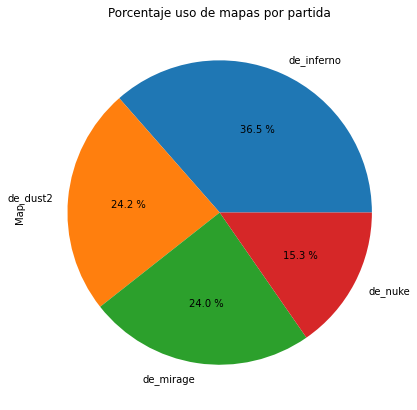

In [ ]:
#Porcentaje uso de mapas por partida
serie = df.Map.value_counts()
plt.rcParams["figure.figsize"] = (7, 7)
serie.plot.pie(autopct="%0.1f %%")
plt.title("Porcentaje uso de mapas por partida")
plt.show()

Se ve que el mapa mas utilizado por los jugadores es "de_inferno" por lo que a los jugandores les gusta mas escoger este mapa por sobre otros.




# FASE 3: Preparación de los datos

Realizacion de 4 labores de limpieza

In [ ]:
#Transformaciones de datos
mapIds = {"de_inferno": 1, "de_nuke": 2, "de_mirage": 3, "de_dust2": 4}
df["Map"] = df["Map"].map(mapIds)

#Eliminar datos iguales a 0 en 'TimeAlive' puesto que no deberia existir ya que no es posible sobrevivir 0 segundos
df.drop(df[df['TimeAlive']==0.0].index)

#Filtrar datos que ocuparemos posteriormente
X = df.filter(
    ['TimeAlive', 'RoundWinner', 'RoundKills','RoundStartingEquipmentValue', 'Map'])
Y = df.Survived.copy()

#Eliminar Columna Survived
df.drop(['Survived'],axis=1)

for col in X.columns:
  print(col)


TimeAlive
RoundWinner
RoundKills
RoundStartingEquipmentValue
Map


Estas son las columnas seleccionadas que son relevantes para el entrenamiento de el modelo. <br> Tambien se define a **Survived** como la variable a predecir.






---

Se definen datos con el fin de validar el modelo en 80% de entrenamiento y el 20% restante en pruebas.

In [ ]:
#Definir datos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

Debido a la brecha entre valores que existe en algunas columnas de la data, como por ejemplo TimeAlive, entre otras, se decide utilizar normalizacion y escalado con el fin de mejorar el desempeño de el modelo.

In [ ]:
#Escalado
X["TimeAlive"] = df['ScaledTimeAlive']
X_normalized = Normalizer().fit_transform(X)
#Redefinir los datos de entrenamiento y prueba , ahora normalizados
X_train, X_test, y_train, y_test = train_test_split(X_normalized, Y, test_size=0.2)




---



# FASE 4: Modelado

## 🟠 Regresion Logistica


Definicion y entrenamiento de el modelo


---



In [ ]:
logistic_model = LogisticRegression(max_iter=1000)

logistic_model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

Prediccion con los datos de pruebas.


---



In [ ]:
Y_pred_l = logistic_model.predict(X_test)

In [ ]:
# Reporte de clasificacion
print(classification_report(y_test, Y_pred_l))

              precision    recall  f1-score   support

       False       0.76      0.78      0.77      9433
        True       0.66      0.63      0.64      6399

    accuracy                           0.72     15832
   macro avg       0.71      0.70      0.71     15832
weighted avg       0.72      0.72      0.72     15832



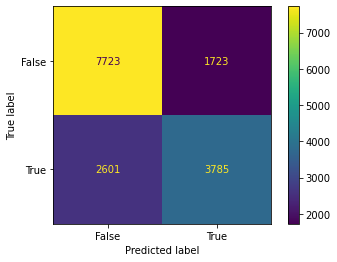

In [ ]:
# Visualizar matriz de confusion
sklearn.metrics.plot_confusion_matrix(logistic_model, X_test, y_test);

La Matriz de Confusión nos indica que tipos de errores se cometen <br>
Resultado:

*   7723 Verdaderos Positivos
*   1723 Falsos Positivos
*   2601 Falsos Negativos
*   3785 Verdaderos Negativos

## 🟠 Arbol de desicion

Definicion y entrenamiento de el modelo


---


In [ ]:
decisionT_model = DecisionTreeClassifier(max_depth=3, max_leaf_nodes=8, min_samples_split=3)
decisionT_model.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=3, max_leaf_nodes=8, min_samples_split=3)

Prediccion con los datos de pruebas.


---

In [ ]:
decisionT_model.fit(X_train, y_train)
Y_pred_arb = decisionT_model.predict(X_test)

In [ ]:
#Reporte de clasificacion
print(classification_report(y_test, Y_pred_arb))

              precision    recall  f1-score   support

       False       0.80      0.68      0.74      9433
        True       0.61      0.75      0.68      6399

    accuracy                           0.71     15832
   macro avg       0.71      0.72      0.71     15832
weighted avg       0.73      0.71      0.71     15832



En un principio se puede ver que el modelo no llega al 80%

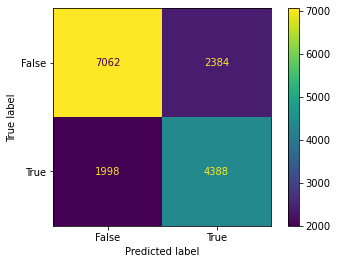

In [ ]:
# Visualizar matriz de confusion
sklearn.metrics.plot_confusion_matrix(decisionT_model, X_test, y_test);

La Matriz de Confusión nos indica que tipos de errores se cometen <br>
Resultado:

*   7062 Verdaderos Positivos
*   2384 Falsos Positivos
*   1998 Falsos Negativos
*   4388 Verdaderos Negativos

## 🟢 Arbol de desicion con Ensamblado

Definicion y entrenamiento de el modelo


---

In [ ]:
decisionT_model = DecisionTreeClassifier(max_depth=3, max_leaf_nodes=8, min_samples_split=3)
decisionT_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, max_leaf_nodes=8, min_samples_split=3)

In [ ]:
# Modelo es pasado por adaboost
Adaboost_model = AdaBoostClassifier(decisionT_model, n_estimators=10)
Adaboost_model.fit(X_train, y_train)
Y_pred_a = Adaboost_model.predict(X_test)


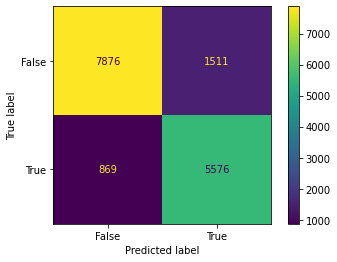

In [ ]:
# Visualizar matriz de confusion
sklearn.metrics.plot_confusion_matrix(Adaboost_model, X_test, y_test);

La Matriz de Confusión nos indica que tipos de errores se cometen <br>
Resultado:

*   7876 Verdaderos Positivos
*   1511 Falsos Positivos
*   869 Falsos Negativos
*   5576 Verdaderos Negativos

In [ ]:
# Reporte clasificacion
encabezado='Reporte de clasificacion'
print(encabezado)
print('-'*len(encabezado))
print(classification_report(y_test, Y_pred_a))


Reporte de clasificacion
------------------------
              precision    recall  f1-score   support

       False       0.88      0.83      0.85      9451
        True       0.77      0.84      0.80      6381

    accuracy                           0.83     15832
   macro avg       0.82      0.83      0.83     15832
weighted avg       0.84      0.83      0.83     15832



**Finalmente** luego de ser pasado por el ensamblado Adaboost y verificado con los datos de prueba , el modelo mejora y alcanza un desempeño Sobre el **80% de precisión.** ✅

## 🟠 Bosque Aleatorio

Definicion y entrenamiento de el modelo


---

In [ ]:
forestModel = RandomForestClassifier()
forestModel.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
Y_pred_r = forestModel.predict(X_test)

In [ ]:
print(classification_report(y_test, Y_pred_r))

              precision    recall  f1-score   support

       False       0.77      0.76      0.76      9446
        True       0.65      0.66      0.66      6386

    accuracy                           0.72     15832
   macro avg       0.71      0.71      0.71     15832
weighted avg       0.72      0.72      0.72     15832



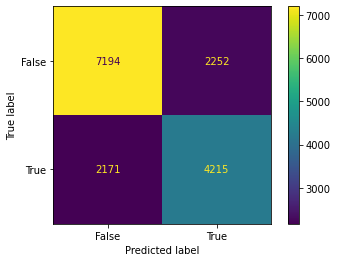

In [ ]:
# Visualizar matriz de confusion
sklearn.metrics.plot_confusion_matrix(forestModel, X_test, y_test);

La Matriz de Confusión nos indica que tipos de errores se cometen <br>
Resultado:

*   7194 Verdaderos Positivos
*   2252 Falsos Positivos
*   2171 Falsos Negativos
*   4215 Verdaderos Negativos

## 🟢 Bosque Aleatorio con ensamblado



Definicion y entrenamiento de el modelo


---

In [ ]:
forestModel = RandomForestClassifier(max_depth=3, max_leaf_nodes=8, min_samples_split=3)


Definicion de el modelo con hiperparametros:

*   max_depth: Maxima profundidad que alcanzara
*   max_leaf_nodes: Numero maximo de nodos



In [ ]:
forestModel.fit(X_train, y_train)
Y_pred_r = forestModel.predict(X_test)

In [ ]:
# Modelo es pasado por adaboost
Adaboost_model_b = AdaBoostClassifier(forestModel, n_estimators=10)
Adaboost_model_b.fit(X_train, y_train)
Y_pred_ada_b = Adaboost_model_b.predict(X_test)

In [ ]:
#Reporte de clasificacion
print(classification_report(y_test, Y_pred_ada_b))

              precision    recall  f1-score   support

       False       0.89      0.88      0.89      9428
        True       0.83      0.84      0.83      6404

    accuracy                           0.86     15832
   macro avg       0.86      0.86      0.86     15832
weighted avg       0.86      0.86      0.86     15832



Luego de el entrenamiento y  ensamblado con Adaboost , ademas verificado con los datos de prueba , el modelo logra alcanzar un desempeño Sobre el  **80% de precisión.** ✅

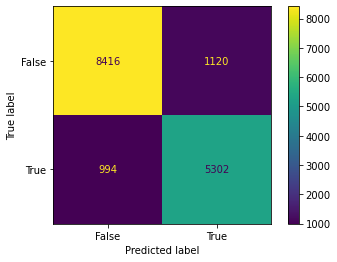

In [ ]:
sklearn.metrics.plot_confusion_matrix(Adaboost_model_b, X_test, y_test);

La Matriz de Confusión nos indica que tipos de errores se cometen <br>
Resultado:

*   8416 Verdaderos Positivos
*   1120 Falsos Positivos
*   994 Falsos Negativos
*   5302 Verdaderos Negativos

Luego de el entrenamiento y  ensamblado con Adaboost , ademas verificado con los datos de prueba , el modelo logra alcanzar un desempeño Sobre el  **80% de precisión.** ✅

## 🟠 Naive Bayes

Definicion y entrenamiento de el modelo


---

In [ ]:
naiveModel = GaussianNB()
naiveModel.fit(X_train, y_train)

GaussianNB()

In [ ]:
Y_pred_n = naiveModel.predict(X_test)

In [ ]:
#Visualizar reporte de clasificacion
print(classification_report(y_test, Y_pred_n))

              precision    recall  f1-score   support

       False       0.71      0.87      0.78      9446
        True       0.71      0.47      0.57      6386

    accuracy                           0.71     15832
   macro avg       0.71      0.67      0.67     15832
weighted avg       0.71      0.71      0.70     15832



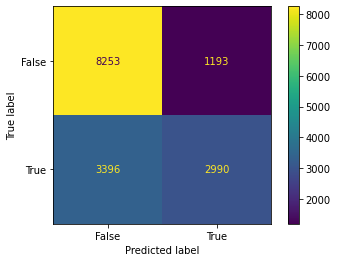

In [ ]:
# Visualizar matriz de confusion
sklearn.metrics.plot_confusion_matrix(naiveModel, X_test, y_test);

La Matriz de Confusión nos indica que tipos de errores se cometen <br>
Resultado:

*   8253 Verdaderos Positivos
*   1193 Falsos Positivos
*   3396 Falsos Negativos
*   2990 Verdaderos Negativos

# FASE 5: Evaluación del modelo

### Tabla comparativa

La **exactitud** indica el porcentaje  de elementos clasificados correctamente en comparación con el total.

El **f1-score** resume la precision y sensibilidad en una sola metrica.

La **precision** nos da la calidad de la predicción, el pocentaje de lo que el
modelo ha marcado como positivo y negativo con respecto a lo que en realidad lo son.

La **Sensibilidad** nos indica la proporcion de casos positivos que fueron correctamente identificadas por el algoritmo.


---



In [ ]:
tabla = pd.DataFrame({'Modelo': ["Regresion Logistica", "Arbol de desicion", "Arbol de desicion con ensamblado", "Bosque Aleatorio", "Bosque aleatorio con ensamblado", "Naive Bayes"],
              'Exactitud':    [float(f'{accuracy_score(y_test, Y_pred_l):.2f}'),  float(f'{accuracy_score(y_test, Y_pred_arb):.2f}'),  float(f'{accuracy_score(y_test, Y_pred_a):.2f}'),  float(f'{accuracy_score(y_test, Y_pred_r):.2f}'),  float(f'{accuracy_score(y_test, Y_pred_ada_b):.2f}'),  float(f'{accuracy_score(y_test, Y_pred_n):.2f}')],
              'Precision':    [float(f'{precision_score(y_test, Y_pred_l):.2f}'), float(f'{precision_score(y_test, Y_pred_arb):.2f}'), float(f'{precision_score(y_test, Y_pred_a):.2f}'), float(f'{precision_score(y_test, Y_pred_r):.2f}'), float(f'{precision_score(y_test, Y_pred_ada_b):.2f}'), float(f'{precision_score(y_test, Y_pred_n):.2f}')],
              'Sensibilidad': [float(f'{recall_score(y_test, Y_pred_l):.2f}'),    float(f'{recall_score(y_test, Y_pred_arb):.2f}'),    float(f'{recall_score(y_test, Y_pred_a):.2f}'),    float(f'{recall_score(y_test, Y_pred_r):.2f}'),    float(f'{recall_score(y_test, Y_pred_ada_b):.2f}'),    float(f'{recall_score(y_test, Y_pred_n):.2f}')],
              'f1_score':     [float(f'{f1_score(y_test, Y_pred_l):.2f}'),        float(f'{f1_score(y_test, Y_pred_arb):.2f}'),        float(f'{f1_score(y_test, Y_pred_a):.2f}'),        float(f'{f1_score(y_test, Y_pred_r):.2f}'),        float(f'{f1_score(y_test, Y_pred_ada_b):.2f}'),        float(f'{f1_score(y_test, Y_pred_n):.2f}')]})



,Modelo,Exactitud,Precision,Sensibilidad,f1_score
0,Regresion Logistica,0.72,0.66,0.62,0.64
1,Arbol de desicion,0.73,0.65,0.71,0.68
2,Arbol de desicion con ensamblado,0.85,0.79,0.87,0.83
3,Bosque Aleatorio,0.73,0.69,0.59,0.64
4,Bosque aleatorio con ensamblado,0.85,0.82,0.82,0.82
5,Naive Bayes,0.71,0.72,0.46,0.56


Se puede visualizar que en base a las metricas, los modelos con mayor desempeño fueron el Bosque aleatorio con ensamblado y el arbol de desicion con ensamblado, obteniendo por sobre el 80% de desempeño en la mayoria de estas.

### Seleccion de el mejor modelo: Bosque Aleatorio 🌳

Debido a que el modelo de Bosque aleatorio con ensamblado alcanzo un mayor desempeño que los demas, ademas de ser el unico que obtuvo sobre 80% en todas las metricas sin exepcion.

### Validacion Cruzada

In [ ]:
print(cross_val_score(Adaboost_model, X_train, y_train, cv=4))

[0.86571501 0.86235866 0.86425368 0.85806329]


Finalmente se realiza una validacion cruzada con el fin de determinar posible overfiting en el modelo. <br> El resultado nos dice que es un modelo sin problemas de overfiting.

### Conclusiones Finales

Habiendo analizado a fondo el modelo de bosque aleatorio y siendo comparado con otros , se concluye que es un modelo aceptable para poder predecir si un jugador sobrevivira o no en una determinada partida al haber obtenido un desempeño dentro de lo esperado.

# FASE 6: Despliegue

In [ ]:
X_new = pd.DataFrame({'TimeAlive': [30], 'RoundWinner': [False], 'RoundKills': [0], 'RoundStartingEquipmentValue': [100], 'Map': [1]})
Adaboost_model.predict(X_new)

array([False])



---


Con estos datos esperamos que el jugador **no sobreviva** la ronda, porque no vivo mucho tiempo y ademas no obtuvo kills.

In [ ]:
X_new = pd.DataFrame({'TimeAlive': [7123], 'RoundWinner': [True], 'RoundKills': [0], 'RoundStartingEquipmentValue': [100], 'Map': [3]})
Adaboost_model.predict(X_new)



array([False])



---


Con estos datos esperamos que el jugador **no sobreviva** la ronda, Ya que si bien gano la ronda su tiempo de vida fue corto ademas de no matar a ningun jugador

In [ ]:
X_new = pd.DataFrame({'TimeAlive': [210],'RoundWinner': [False] ,'RoundKills': [5], 'RoundStartingEquipmentValue': [5200], 'Map': [1]})
Adaboost_model.predict(X_new)

array([ True])



---


Con estos datos esperamos que el jugador **sobreviva** la ronda, porque tiene mucho tiempo de vida y aporto significativamente en la ronda realizando 5 asesinatos por lo que mato a todos los enemigos y tiene bastante dinero desde el comienzo de esta ronda por lo que se espera que lo gaste en comprarse mejores armas y armadura.

In [ ]:
X_new = pd.DataFrame({'TimeAlive': [18], 'RoundWinner': [True], 'RoundKills': [2], 'RoundStartingEquipmentValue': [1000], 'Map': [2]})

Adaboost_model.predict(X_new)


array([False])



---


Con estos datos esperamos que el jugador **no sobreviva** la ronda, porque no tiene mucho tiempo de vida y no obtuvo una gran cantidad de kills.

In [ ]:
X_new = pd.DataFrame({'TimeAlive': [305], 'RoundWinner': [True], 'RoundKills': [5], 'RoundStartingEquipmentValue': [5200], 'Map': [1]})
Adaboost_model.predict(X_new)

array([ True])



---


Con estos datos esperamos que el jugador **sobreviva** la ronda, porque tiene mucho tiempo de vida y aporto significativamente en la ronda realizando 5 asesinatos por lo que mato a todos los enemigos y tiene bastante dinero desde el comienzo de esta ronda por lo que se espera que lo gaste en comprarse mejores armas y armadura.

In [ ]:
X_new = pd.DataFrame({'TimeAlive': [55], 'RoundWinner': [False], 'RoundKills': [0], 'RoundStartingEquipmentValue': [400], 'Map': [4]})
Adaboost_model.predict(X_new)


array([False])



---


Con estos datos esperamos que el jugador **no sobreviva** la ronda, porque no vivio mucho tiempo y no obtuvo una buena cantidad de kills.

In [ ]:
X_new = pd.DataFrame({'TimeAlive': [43], 'RoundWinner': [True], 'RoundKills': [3], 'RoundStartingEquipmentValue': [4200], 'Map': [1]})
Adaboost_model.predict(X_new)

array([False])



---


Con estos datos esperamos que el jugador **no sobreviva** la ronda, Si bien obtuvo una buena racha de kills, este no vivio mucho tiempo.

In [ ]:
X_new = pd.DataFrame({'TimeAlive': [540], 'RoundWinner': [True], 'RoundKills': [1], 'RoundStartingEquipmentValue': [4800], 'Map': [1]})
Adaboost_model.predict(X_new)

array([ True])



---


Con estos datos esperamos que el jugador **sobreviva** la ronda, porque si bien el jugador no obtuvo muchas kills, este logro por lo menos tener 1 ademas de que tuvo un largo tiempo de vida.

In [ ]:
X_new = pd.DataFrame({'TimeAlive': [34], 'RoundWinner': [False], 'RoundKills': [1], 'RoundStartingEquipmentValue': [100], 'Map': [3]})
Adaboost_model.predict(X_new)

array([False])



---


Con estos datos esperamos que el jugador **no sobreviva** la ronda, porque no tiene mucho tiempo de vida, ademas de no tener muchas Kills.

In [ ]:
X_new = pd.DataFrame({'TimeAlive': [770], 'RoundWinner': [False], 'RoundKills': [3], 'RoundStartingEquipmentValue': [6000], 'Map': [1]})
Adaboost_model.predict(X_new)

array([ True])



---


Con estos datos esperamos que el jugador **sobreviva** la ronda, porque vivio mucho tiempo, obtuvo una buena racha de kills ademas de comenzar la ronda con mucho dinero inicial.

### Conclusiones

Los 2 datos mas importantes son TimeAlive y RoundWinner, mientras tenga mas tiempo vivo el jugador, mas probabilidad existe de que termine sobreviviendo al final de la ronda.
Tambien si el equipo gana la ronda aumenta las probabilidades de sobrevivirla.

Como recomendacion, al momento de querer apostar por algun jugador, debe tener en cuenta estas dos variables , pero esto no significa que la prediccion sera correcta si considera solo las dos, ya que los demas factores igual infuyen, aunque con un menor impacto en el resultado final.